In [118]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image,ImageOps
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [110]:
base=os.getcwd()
print(base)

C:\Users\Aditi Dona\Desktop\CN DATASCIENCE\Deep Learning\Project-Distracted Driver Detection


In [111]:
x=[]
y=[]
train_dir=os.path.join(base,'imgs','train')
labels=os.listdir(train_dir)
for label in range(len(labels)):
    images=os.listdir(train_dir+'\\c'+str(label))
    for im in images:
        image=Image.open(train_dir+'\\c'+str(label)+'\\'+im)
        image=ImageOps.grayscale(image)
        image=image.resize((240,240))
        image=np.array(image)
        x.append(image)
        y.append(label)
    print('---Images of label:',label,'read---')

---Images of label: 0 read---
---Images of label: 1 read---
---Images of label: 2 read---
---Images of label: 3 read---
---Images of label: 4 read---
---Images of label: 5 read---
---Images of label: 6 read---
---Images of label: 7 read---
---Images of label: 8 read---
---Images of label: 9 read---


In [130]:
x=np.array(x)
y=np.array(y)

In [131]:
print(x.shape,y.shape)

(22424, 240, 240, 1) (22424,)


In [132]:
x=x.reshape(-1,240,240,1)

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [134]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [135]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(240,240,1),padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))


model.add(Dense(10, activation='softmax'))

In [136]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
370/561 [==================>...........] - ETA: 21:52 - loss: 0.4790 - accuracy: 0.8595

In [3]:
print(os.getcwd())

C:\Users\Aditi Dona\Desktop\CN DATASCIENCE\Deep Learning\Project-Distracted Driver Detection


In [4]:
# shape of the image
im=imread('imgs/train/c0/*.jpg')
image=im[0]
print(image.shape)

(480, 640, 3)


In [6]:
# loading the images

base='./imgs'
train_dir=os.path.join(base,'train')
test_dir=os.path.join(base,'test')

x_train=[]
y_train=[]
x_test=[]
y_test=[]
train_data_gen=ImageDataGenerator(rescale=1.0/255)
(x_train,y_train)=train_data_gen.flow_from_directory(directory=train_dir,target_size=(240,240),color_mode='grayscale')
(x_test,y_test)=

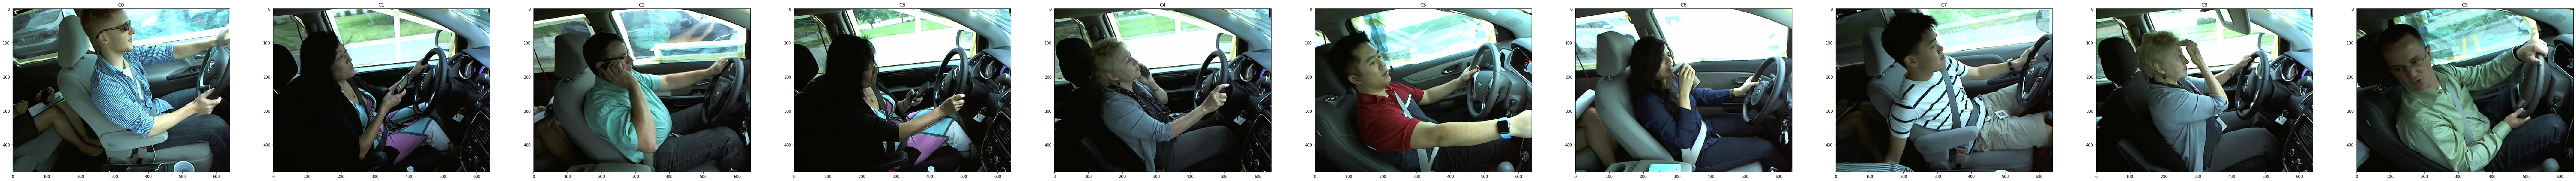

In [3]:
##Before Graying images
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
  #print('now we are in the folder C',i)
    labels = imread("imgs/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        label = i
        ax[i].imshow(img)
        ax[i].set_title('C'+str(i))
        plt.show

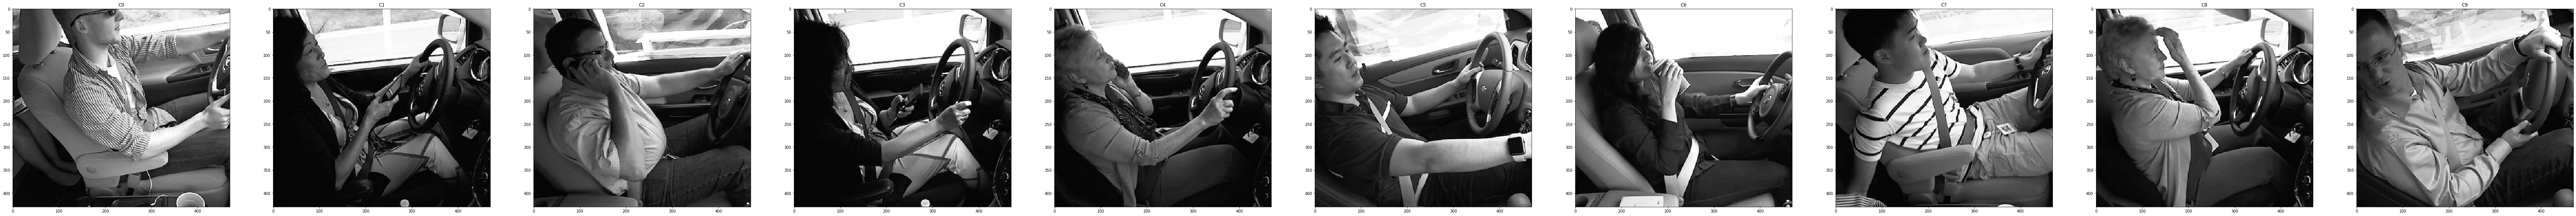

In [5]:
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
  #print('now we are in the folder C',i)
    labels = imread("imgs/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        label = i
        ax[i].imshow(img,cmap='gray')
        ax[i].set_title('C'+str(i))
        plt.show

In [17]:
train_image = []
image_label = []


for i in range(10):
    print('Location folder C',i)
    labels = imread("imgs/train/c"+str(i)+"/*.jpg")
    for j in range(len(labels)):
  #for j in range(500):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(240,240))
        label = i
        train_image.append([img,label])
        image_label.append(i)

Location folder C 0
Location folder C 1
Location folder C 2
Location folder C 3
Location folder C 4
Location folder C 5
Location folder C 6
Location folder C 7
Location folder C 8
Location folder C 9


In [19]:
import random
random.shuffle(train_image)

In [20]:
## Splitting the image and label to two different lists

X = []
Y = []
for features,labels in train_image:
    X.append(features)
    Y.append(labels)

print (len(X), len(Y))

22424 22424


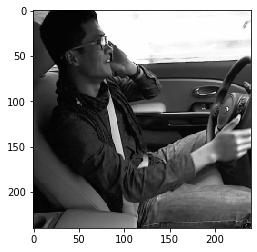

4


In [21]:
plt.imshow(X[5],cmap= 'gray')
plt.show()
print(Y[5])

In [24]:
## Converting images to nparray. Encoding the Y

X = np.array(X).reshape(-1,240,240,1)
Y = to_categorical(Y)

print (X.shape)

MemoryError: Unable to allocate 9.62 GiB for an array with shape (22424, 240, 240) and data type float64

In [25]:
print(Y[5])

4


In [26]:
## Designing the Layers
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [27]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,1),padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))


model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'

In [ ]:
## Fitting the model
model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

FileNotFoundError: [WinError 3] The system cannot find the path specified: './state-farm-distracted-driver-detection/imgs/test'

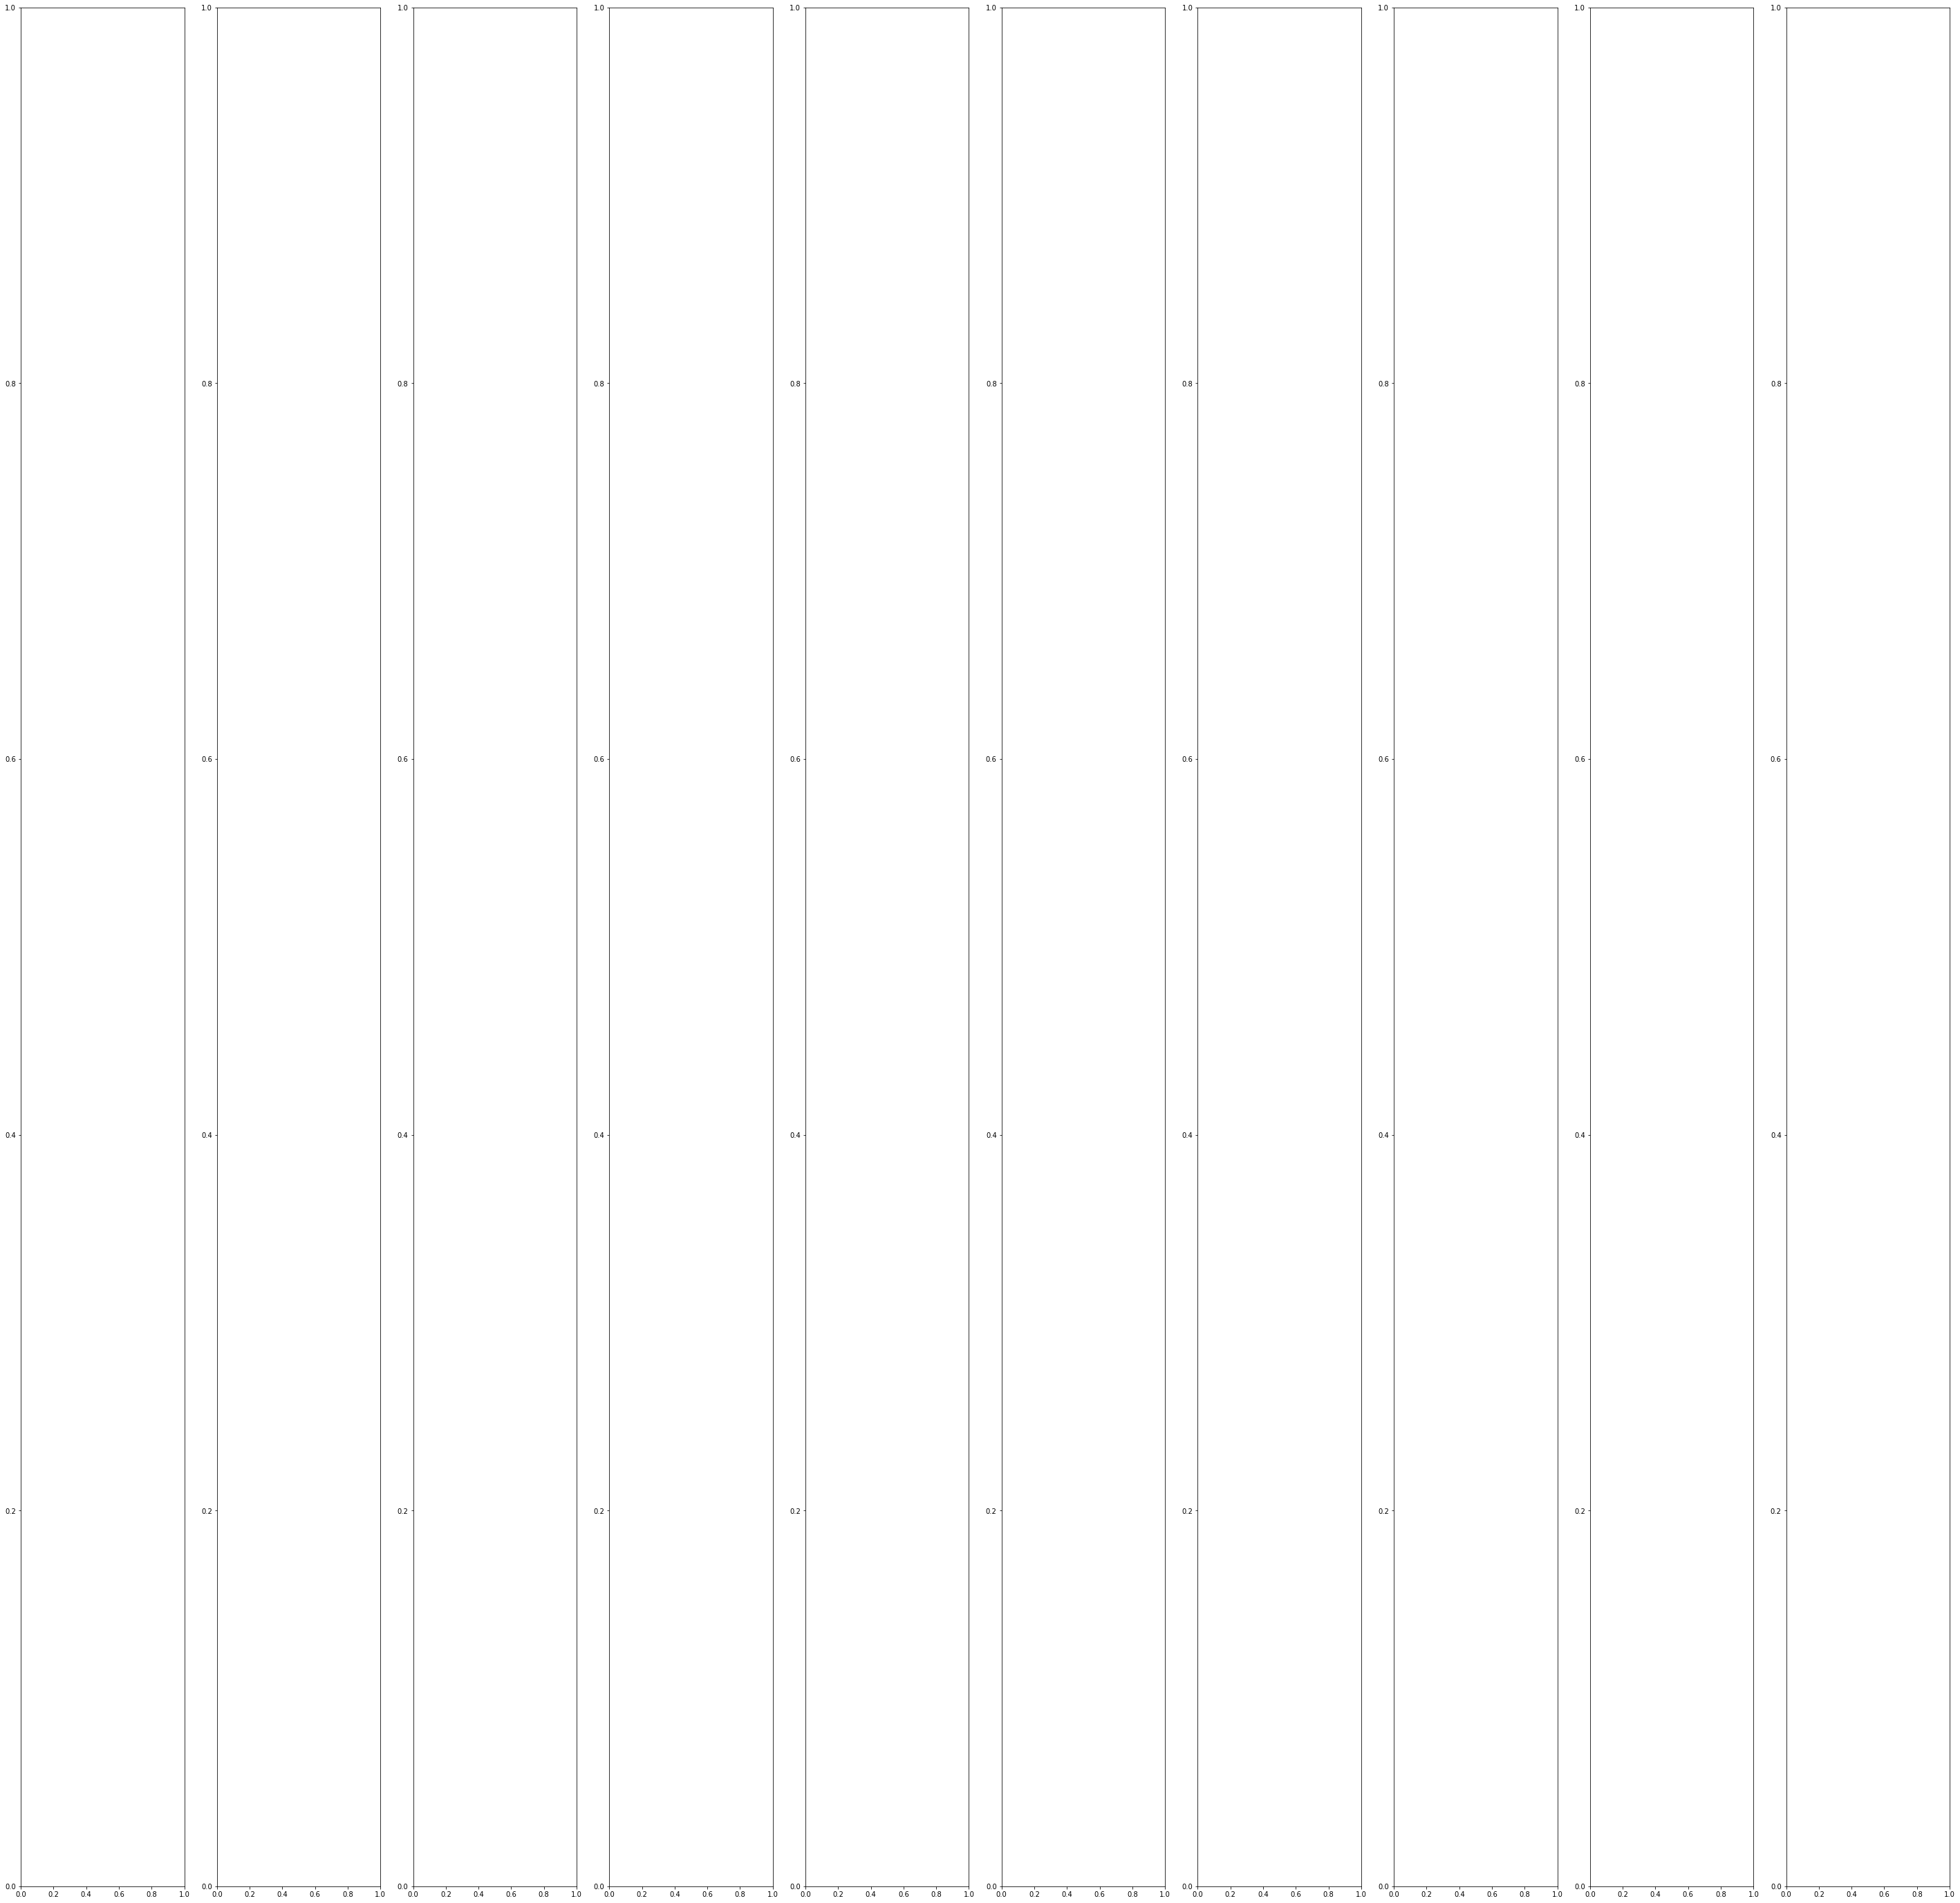

In [28]:
# labels is the image array
test_image = []
i = 0
fig, ax = plt.subplots(1, 10, figsize = (50,50 ))

files = os.listdir('./state-farm-distracted-driver-detection/imgs/test')
nums = np.random.randint(low=1, high=len(files), size=10)
for i in range(10):
    print ('Image number:',i)
    img = cv2.imread('./state-farm-distracted-driver-detection/imgs/test/'+files[nums[i]])
    img = color.rgb2gray(img)
    #img = img[100:,300:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show

In [ ]:
test = []

for img in test_image:
    test.append(img)

test = np.array(test).reshape(-1,224,224,1)
prediction = model.predict(test)